In [9]:
import pandas as pd
import numpy as np

1. Normalization and standardisation
2. Scaling to minimun and Maximum values (MinMaxScaler)
3. Scaling to Median and quantiles (RobustScaler)
4. Gaussian transformation: 
   log Transformations, Reciprocal transformations, Square root Transformations,

   Exponentional Transformations, Box cox transformation


# Standardisation
here we try to change all the varaibles to the similar scale. standardization means centering the variables to zero.
z=(xi-x_mean)/std.

We use Standardscalar from sklearn library

In [10]:
df=pd.read_csv("titanic.csv",usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()
df_scale=scaler.fit_transform(df)

In [16]:
df_scale1=pd.DataFrame(df_scale)
df_scale1.head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [17]:
df_scale1.columns=['Survived','Pclass','Age','Fare']
df_scale1.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [18]:
import seaborn as sns

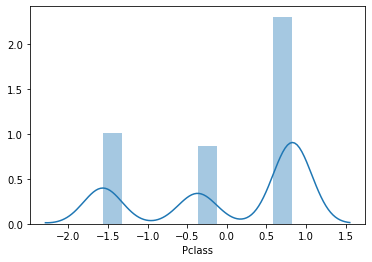

In [19]:
sns.distplot(df_scale1.Pclass)

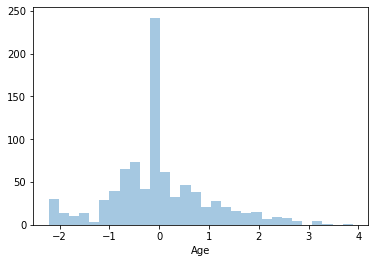

In [20]:
sns.distplot(df_scale1.Age,kde=False)

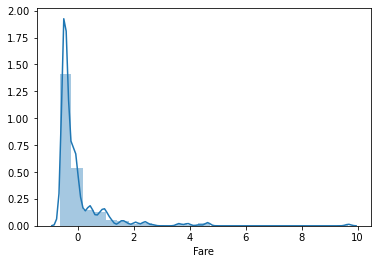

In [21]:
sns.distplot(df_scale1["Fare"],bins=25)

## MinMax scaling------- Mostly used for deep learning models

MinMax scaling scales/transforms the value between 0-1(0 to 1)
       (x-x.min)/(x.max-x.min)----#range
       
       
       
###### CNN the images ranges from 0-255 pixels divide those images pixels with 255.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
minmax=MinMaxScaler()
minmax_scale=minmax.fit_transform(df)
df_minmax=pd.DataFrame(minmax_scale,columns=df.columns)

In [25]:
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


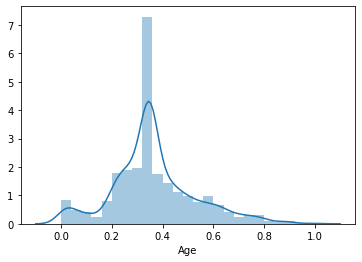

In [26]:
sns.distplot(df_minmax['Age'],bins=25)

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 30.,  17.,  15.,   9.,  29.,  64.,  67.,  70., 260.,  62.,  51.,
         40.,  35.,  27.,  35.,  23.,  15.,   9.,  11.,  11.,   4.,   2.,
          3.,   1.,   1.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

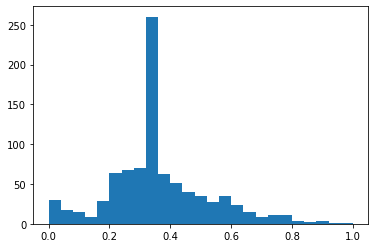

In [28]:
plt.hist(df_minmax['Age'],bins=25)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 491.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

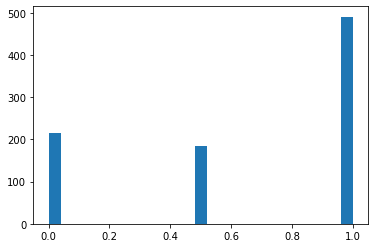

In [20]:
plt.hist(df_minmax['Pclass'],bins=25)

(array([519., 197.,  55.,  47.,  20.,  15.,   7.,   9.,   2.,   0.,   5.,
          4.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <a list of 25 Patch objects>)

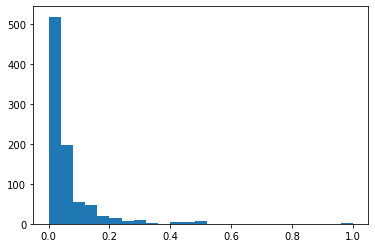

In [21]:
plt.hist(df_minmax['Fare'],bins=25)

## Robust Scaler
##### Robust Scaler is used to scale/transform the fearture to median and quantiles
IQR= 75th quantile- 25th quantile
- scaled=(x-x.median)/IQR
- Once the distribution is skewed, mean ,median and quantiles are the best transformations

In [22]:
from sklearn.preprocessing import RobustScaler

In [23]:
rscaler=RobustScaler()
df_rscaler=pd.DataFrame(rscaler.fit_transform(df),columns=df.columns)
df_rscaler

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

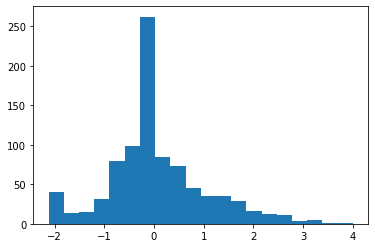

In [24]:
plt.hist(df_rscaler['Age'],bins=20)

## Guassian Transformations:


Checking the data distribution is normal/Guassian or not using Q-Q plot

In [25]:
df1=pd.read_csv("titanic.csv",usecols=['Age','Fare','Survived'])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [27]:
## Fill na
df1['Age']=df1['Age'].fillna(df1['Age'].median())

In [28]:
df1.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [29]:
import matplotlib.pyplot as plt
import scipy
import pylab as py
%matplotlib inline


def check_distribution(df,feature):
    scipy.stats.probplot(df[feature], dist="norm", plot=py)
    py.show()

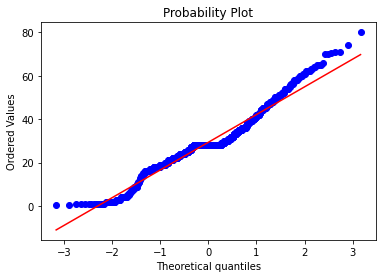

In [30]:
check_distribution(df1,'Age')

##### Logarithmic Transformations

It is used when ur data is rightly or left skewed

In [31]:
df1['Age_log']=np.log(df1['Age'])

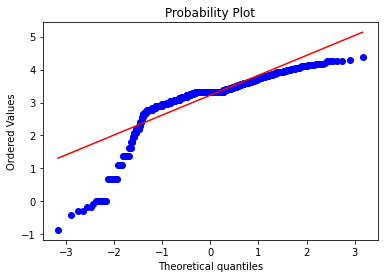

In [32]:
check_distribution(df1,'Age_log')

#### Reciprocal Transformations

In [33]:
df1['Age_reci']=1/df1['Age']

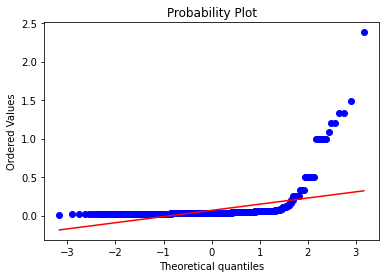

In [34]:
check_distribution(df1,'Age_reci')

#### Squareroot Transformations


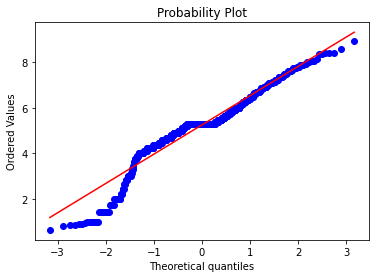

In [35]:
df1['Age_sqr']=df1['Age']**(1/2)
check_distribution(df1,'Age_sqr')

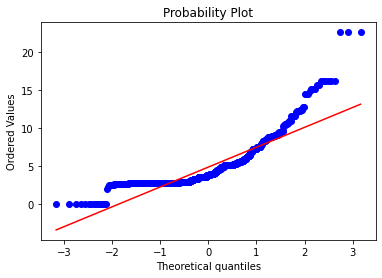

In [36]:
df1['Fare_sqr']=df1['Fare']**(1/2)
check_distribution(df1,'Fare_sqr')

#### Exponential transformations

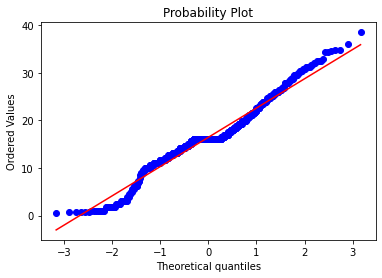

In [37]:
df1['Age_exp']=df1['Age']**(1/1.2)
check_distribution(df1,'Age_exp')

#### BoxCox Transformations